In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
enquiry_data_path = "Original Data/Enquiry_data.csv"
pincode_data_path = "Original Data/pin_sheet.csv"

In [3]:
enquiry_df = pd.read_csv(enquiry_data_path)
pincode_df = pd.read_csv(pincode_data_path)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,4,5,17,18,37,38,40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
enquiry_df.shape

(241871, 55)

### Data cleaning =  Duplicate rows

In [5]:
enquiry_df = enquiry_df.drop_duplicates()
enquiry_df.shape

(241003, 55)

In [6]:
enquiry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241003 entries, 0 to 241870
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Enquiry                   241003 non-null  object 
 1   DocDate                   241002 non-null  object 
 2   DocTime                   240998 non-null  object 
 3   Month                     240998 non-null  object 
 4   Day                       241000 non-null  object 
 5   Week                      240999 non-null  object 
 6   BookingNo                 209529 non-null  object 
 7   AllocationNo              206215 non-null  object 
 8   DealerCity                216375 non-null  object 
 9   DealerState               240866 non-null  object 
 10  BranchType                240963 non-null  object 
 11  LeadType                  241000 non-null  object 
 12  PaymentMode               240903 non-null  object 
 13  Area                      239253 non-null  o

### Data cleaning =  Columns with >80% null values

In [7]:
null_cols = ['ExchangeModel','ExchangeDate','Color','CurrentTwoWheeler','CurrentFourWheeler','OwnershipStatus',
             'MaritalStatus','EducationalQualification','HouseholdIncome','LostToModel',
             'InsuranceCompany','ActualFollowUpDate','LostRemarks']
enquiry_df = enquiry_df.drop(null_cols,axis=1)
enquiry_df.shape

(241003, 42)

In [8]:
enquiry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241003 entries, 0 to 241870
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Enquiry              241003 non-null  object 
 1   DocDate              241002 non-null  object 
 2   DocTime              240998 non-null  object 
 3   Month                240998 non-null  object 
 4   Day                  241000 non-null  object 
 5   Week                 240999 non-null  object 
 6   BookingNo            209529 non-null  object 
 7   AllocationNo         206215 non-null  object 
 8   DealerCity           216375 non-null  object 
 9   DealerState          240866 non-null  object 
 10  BranchType           240963 non-null  object 
 11  LeadType             241000 non-null  object 
 12  PaymentMode          240903 non-null  object 
 13  Area                 239253 non-null  object 
 14  State                240561 non-null  object 
 15  City             

### Data cleaning =  Columns with wrong data

In [9]:
wrong_cols = ['OverallRating','Style','PickUp','Features','Ridecomfort','ExchangeAmount']
enquiry_df = enquiry_df.drop(wrong_cols,axis=1)
enquiry_df.shape

(241003, 36)

In [10]:
enquiry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241003 entries, 0 to 241870
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Enquiry              241003 non-null  object 
 1   DocDate              241002 non-null  object 
 2   DocTime              240998 non-null  object 
 3   Month                240998 non-null  object 
 4   Day                  241000 non-null  object 
 5   Week                 240999 non-null  object 
 6   BookingNo            209529 non-null  object 
 7   AllocationNo         206215 non-null  object 
 8   DealerCity           216375 non-null  object 
 9   DealerState          240866 non-null  object 
 10  BranchType           240963 non-null  object 
 11  LeadType             241000 non-null  object 
 12  PaymentMode          240903 non-null  object 
 13  Area                 239253 non-null  object 
 14  State                240561 non-null  object 
 15  City             

### Data cleaning =  Columns not useful for prediction

In [11]:
useless_cols = ['DocDate','DocTime','Month','Day','Week','BookingNo','AllocationNo','Area','ExpectedBookingDate',
                'SaleChannel','FollowUpDate','Make','SubSource']
enquiry_df = enquiry_df.drop(useless_cols,axis=1)
enquiry_df.shape

(241003, 23)

In [12]:
enquiry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241003 entries, 0 to 241870
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Enquiry          241003 non-null  object 
 1   DealerCity       216375 non-null  object 
 2   DealerState      240866 non-null  object 
 3   BranchType       240963 non-null  object 
 4   LeadType         241000 non-null  object 
 5   PaymentMode      240903 non-null  object 
 6   State            240561 non-null  object 
 7   City             240931 non-null  object 
 8   Pin              240964 non-null  float64
 9   ModelFamily      240997 non-null  object 
 10  ModelCode        240997 non-null  object 
 11  TotalAmount      240997 non-null  float64
 12  TestRideOffered  233511 non-null  object 
 13  Occupation       754 non-null     object 
 14  DOB              26738 non-null   object 
 15  LeadStatus       240997 non-null  object 
 16  LeadLostReason   26480 non-null   obje

### Drop duplicates again

In [13]:
enquiry_df.shape

(241003, 23)

In [14]:
enquiry_df = enquiry_df.drop_duplicates()
enquiry_df.shape

(240765, 23)

### Data cleaning = Enquiry column

In [15]:
for length in range(0,30):
    print(length,":",len(enquiry_df['Enquiry'][enquiry_df['Enquiry'].str.len()==length]))
    display(enquiry_df['Enquiry'][enquiry_df['Enquiry'].str.len()==length])

0 : 0


Series([], Name: Enquiry, dtype: object)

1 : 0


Series([], Name: Enquiry, dtype: object)

2 : 2


7211     \r\n
16331    \r\n
Name: Enquiry, dtype: object

3 : 0


Series([], Name: Enquiry, dtype: object)

4 : 0


Series([], Name: Enquiry, dtype: object)

5 : 0


Series([], Name: Enquiry, dtype: object)

6 : 0


Series([], Name: Enquiry, dtype: object)

7 : 0


Series([], Name: Enquiry, dtype: object)

8 : 0


Series([], Name: Enquiry, dtype: object)

9 : 0


Series([], Name: Enquiry, dtype: object)

10 : 0


Series([], Name: Enquiry, dtype: object)

11 : 0


Series([], Name: Enquiry, dtype: object)

12 : 0


Series([], Name: Enquiry, dtype: object)

13 : 2


40365    ,,,,Showroom"
69086    ,,,,Showroom"
Name: Enquiry, dtype: object

14 : 3


4201     ENQ11214201261
14736    ENQ10167201247
49618    ENQ11214201231
Name: Enquiry, dtype: object

15 : 37


2204     ENQ112142012261
5811     ENQ112072012844
7863     ENQ101672012116
8039     DENQ11214201281
12541    ENQ112072012633
13113    ENQ112142012178
13807    ENQ101672012708
14735    ENQ112142012522
15758    ENQ112142012690
18538    ENQ112142012436
19479    ENQ112142012456
21110    ENQ112072012817
21841    ,2nd Follow up"
25833    ENQ112072012628
29772    ENQ112142012608
30831    ENQ112142012442
30892    ENQ101672012228
31708    ENQ112142012772
32088    ENQ112142012710
33070    ENQ112142012495
34348    ENQ112072012481
34962    ENQ101672012367
37534    ENQ112072012336
38545    ENQ112142012404
45443    ENQ101672012263
46166    ENQ101672012935
47731    ENQ112072012332
48030    ENQ112142012187
50751    ENQ112072012427
54610    ENQ112142012251
55471    ENQ101672012659
56968    ENQ101672012908
65039    ENQ112142012649
65788    ENQ112072012849
74888    ENQ112072012388
76315    ENQ112142012413
78275    ENQ112142012173
Name: Enquiry, dtype: object

16 : 847


123       BENQ115811700019
290       BENQ106321800064
359       BENQ116551800017
449       BENQ118121700005
578       ENQIN01201801073
                ...       
241621    ENQKR01201700386
241642    ENQDB01201700505
241661    ENQIN01201700406
241662    ENQDB01201700508
241839    ENQBS01201700296
Name: Enquiry, Length: 847, dtype: object

17 : 44283


1         ENQ10209201700861
13        ENQ12051201702593
16        ENQ12061201601730
19        ENQ12138201601941
26        ENQ10734201400564
                ...        
241858    ENQBRN01201700076
241864    ENQ11562201701018
241865    ENQ11562201701160
241866    ENQBRN02201700059
241868    ENQ11943201701220
Name: Enquiry, Length: 44283, dtype: object

18 : 116799


2         ENQ100602016012972
4         ENQ114692015000258
5         ENQ115482016000180
8         ENQ114322016000910
9         ENQ102722014002231
                 ...        
241859    ENQ107262017000281
241860    ENQ102712017000262
241863    ENQ109562017000053
241869    ENQ104112017001053
241870    ENQ118562017000687
Name: Enquiry, Length: 116799, dtype: object

19 : 65258


0         DENQ100572014000277
6         DENQ102002015001992
7         DENQ109492014000114
11        DENQ117262015000170
14        DENQ114122014001483
                 ...         
241823    DENQ101872017000119
241827    DENQ102802017001874
241846    ENQ10337TH201700013
241847    DENQ102802017001889
241861    DENQ104732017000718
Name: Enquiry, Length: 65258, dtype: object

20 : 569


283       ENQ10047BN2201701116
686       DENQNW10639201600568
1336      DENQNW10639201601102
1677      ENQ10047BN2201701877
1732      DENQNW10639201400009
                  ...         
238118    ENQBRN-0120170000042
238218    DENQNW10639201700286
238978    DENQTN10639201700092
239799    DENQTN10639201700094
240199    DENQNW10639201700299
Name: Enquiry, Length: 569, dtype: object

21 : 252


10        ENQPR0110173201600446
1734      ENQ10937BRN0420161350
2063      ENQ10937BRN0420160353
2767      ENQPR0110173201600171
3343      ENQPR0110173201800808
                  ...          
239312    ENQPR0110173201700233
240010    ENQPR0110173201700234
240835    ENQPR0110173201700241
241696    ENQ10937BRN0420170189
241790    ENQ10937BRN0420170158
Name: Enquiry, Length: 252, dtype: object

22 : 7710


3         ENQ10411BRN01201705686
20        ENQ0000028292201800786
30        ENQ0000011476201801858
31        ENQ10411BRN01201512906
75        ENQ0000026977201701293
                   ...          
241751    ENQ10274BRN01201700139
241800    ENQ10479BRN02201700651
241819    ENQ10411BRN01201701790
241834    ENQ11690BRN01201700053
241855    ENQ10479BRN02201700626
Name: Enquiry, Length: 7710, dtype: object

23 : 3664


21        DENQ10268ASC01201400074
116       DENQ0000028292201500552
132       ENQ10408BRN022016000138
222       DENQ12084BRN01201400010
423       DENQ0000026977201600250
                   ...           
241559    DENQ10047BRN11201700109
241566    DENQ0000026977201700073
241627    DENQ0000026884201700015
241850    ENQ11716BRN032017000104
241862    ENQ11057BRN012017000086
Name: Enquiry, Length: 3664, dtype: object

24 : 1339


12        DENQ00000298992015000479
42        DENQ10408BRN012016000808
1428      DENQ10408BRN022016000503
1697      DENQ10408BRN022015000592
1890      DENQ11716BRN042014000024
                    ...           
240063    DENQ10416BRN012017000058
240284    DENQ10408BRN012017000013
240380    DENQ11716BRN022017000015
240656    DENQ11577BRN012017000055
241206    DENQ10408BRN012017000016
Name: Enquiry, Length: 1339, dtype: object

25 : 0


Series([], Name: Enquiry, dtype: object)

26 : 0


Series([], Name: Enquiry, dtype: object)

27 : 0


Series([], Name: Enquiry, dtype: object)

28 : 0


Series([], Name: Enquiry, dtype: object)

29 : 0


Series([], Name: Enquiry, dtype: object)

In [16]:
def extract_string(x):
    x = "".join(re.findall("[a-zA-Z]*", x)[0])
    return x

valid_enq = pd.Series(list(map(extract_string,enquiry_df['Enquiry']))).value_counts().index.tolist()
del valid_enq[23]

In [17]:
valid_enq

['ENQ',
 'DENQ',
 'ENQBRN',
 'DENQBRN',
 'DENQNW',
 'BENQ',
 'WENQ',
 'ENQIN',
 'ENQKR',
 'ENQWF',
 'ENQPR',
 'DENQTN',
 'ENQMH',
 'ENQHK',
 'ENQBS',
 'ENQDB',
 'DENQsd',
 'ENQNW',
 'PRENQ',
 'WDENQ',
 'DENQDB',
 'DENQBS',
 'ENQTN',
 'WENQWF',
 'ENQBRMC',
 'DENQPR',
 'DENQHK',
 'VMLDD',
 'ENQHN',
 'DENQBR',
 'DENQKR',
 'WDENQWF',
 'DENQRN',
 'DENQBAR',
 'WENQKR']

In [18]:
enquiry_df['Enquiry'].str[:4].value_counts()

ENQ1    146245
DENQ     86383
ENQ0      2763
ENQ2      1846
ENQB      1491
ENQ6       749
BENQ       271
WENQ       175
ENQI       124
ENQK       115
ENQW       114
ENQP       113
ENQM        88
ENQH        86
ENQD        64
ENQN        53
PREN        39
WDEN        28
ENQT         8
VMLD         4
,,,,         2
\r\n         2
,Gen         1
,2nd         1
Name: Enquiry, dtype: int64

In [19]:
enquiry_df.shape

(240765, 23)

In [20]:
def get_valid_enq(x):
    x = x.startswith(tuple(valid_enq))
    return x

enquiry_df = enquiry_df[list(map(get_valid_enq,enquiry_df['Enquiry']))]
enquiry_df.shape

(240759, 23)

In [21]:
enquiry_df['Enquiry'].str[:4].value_counts()

ENQ1    146245
DENQ     86383
ENQ0      2763
ENQ2      1846
ENQB      1491
ENQ6       749
BENQ       271
WENQ       175
ENQI       124
ENQK       115
ENQW       114
ENQP       113
ENQM        88
ENQH        86
ENQD        64
ENQN        53
PREN        39
WDEN        28
ENQT         8
VMLD         4
Name: Enquiry, dtype: int64

In [22]:
enquiry_df.isna().sum()

Enquiry                 0
DealerCity          24601
DealerState           133
BranchType             36
LeadType                0
PaymentMode            97
State                 438
City                   68
Pin                    34
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered      7485
Occupation         240005
DOB                214054
LeadStatus              0
LeadLostReason     214280
FinanceCompany     192191
FollowUpRemarks    226130
FollowUp               66
CustomerAge        207122
SourceOfEnquiry    156967
FollowUpDone            0
dtype: int64

### Data cleaning = DealerCity

In [23]:
new_enq = enquiry_df.copy()
new_enq['DealerCity'] = new_enq['DealerCity'].str.replace("COCHIN","KOCHI").tolist()
enquiry_df['DealerCity'] = enquiry_df['DealerCity'].str.replace("COCHIN","KOCHI").tolist()

### Data cleaning =  DealerState

In [24]:
enquiry_df[enquiry_df['DealerState'].isna()][['DealerCity','DealerState']]

DealerCity DealerState
827         KOCHI         NaN
5167        BIDAR         NaN
9286        BIDAR         NaN
10207       BIDAR         NaN
11518       KOCHI         NaN
...           ...         ...
157157      KOCHI         NaN
160221      KOCHI         NaN
160223      KOCHI         NaN
171772      KOCHI         NaN
172625      KOCHI         NaN

[133 rows x 2 columns]

In [25]:
temp_city_state = sorted(enquiry_df[['DealerCity','DealerState']].groupby(['DealerCity','DealerState']).size().to_dict().keys())
city_state = dict()
for city,state in temp_city_state:
    city_state[city] = state
city_state

{'ABOHAR': 'Punjab',
 'ADILABAD': 'Telangana',
 'AGARTALA': 'Tripura',
 'AGRA': 'Uttar Pradesh',
 'AHMEDABAD': 'Gujarat',
 'AHMEDNAGAR': 'Maharashtra',
 'AIZAWAL': 'Mizoram',
 'AJNALA': 'Punjab',
 'AKBARPUR': 'Uttar Pradesh',
 'AKOLA': 'Maharashtra',
 'ALIBAG': 'Maharashtra',
 'ALIGARH': 'Uttar Pradesh',
 'ALLAHABAD': 'Uttar Pradesh',
 'ALLEPPEY': 'Kerala',
 'ALWAR': 'Rajasthan',
 'ALWAYE': 'Kerala',
 'AMALAPURAM (M)': 'Andhra Pradesh',
 'AMBALA': 'Haryana',
 'AMBEDKAR NAGAR': 'Uttar Pradesh',
 'AMBIKAPUR': 'Chattisgarh',
 'AMRAVATI': 'Maharashtra',
 'AMRELI': 'Gujarat',
 'AMRITSAR': 'Punjab',
 'AMROHA': 'Uttar Pradesh',
 'ANAND': 'Gujarat',
 'ANANTPUR': 'Andhra Pradesh',
 'ANGUL': 'Odisha',
 'ANKLESHWAR': 'Gujarat',
 'ARRAH': 'Bihar',
 'ASANSOL': 'West Bengal',
 'ATRU': 'Rajasthan',
 'AURANGABAD': 'Maharashtra',
 'AURANGABAD (M)': 'Bihar',
 'AURIMORE': 'Uttar Pradesh',
 'AZAMGARH': 'Uttar Pradesh',
 'Ashok Nagar (M)': 'Madhya Pradesh',
 'Assandh (MC)': 'Haryana',
 'BAGALKOT': 'Karnata

In [26]:
new_enq['DealerState'][new_enq['DealerState'].isna()] = new_enq['DealerCity'].map(city_state)
new_state = new_enq['DealerState']
old_state = enquiry_df['DealerState']
old_state = old_state.fillna(new_state)

<ipython-input-26-4b6a48f01ca3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_enq['DealerState'][new_enq['DealerState'].isna()] = new_enq['DealerCity'].map(city_state)


In [27]:
enquiry_df['DealerState'] = old_state
enquiry_df.shape

(240759, 23)

In [28]:
enquiry_df.isna().sum()

Enquiry                 0
DealerCity          24601
DealerState             0
BranchType             36
LeadType                0
PaymentMode            97
State                 438
City                   68
Pin                    34
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered      7485
Occupation         240005
DOB                214054
LeadStatus              0
LeadLostReason     214280
FinanceCompany     192191
FollowUpRemarks    226130
FollowUp               66
CustomerAge        207122
SourceOfEnquiry    156967
FollowUpDone            0
dtype: int64

### Data cleaning = BranchType

In [29]:
temp_city_branch = sorted(enquiry_df[['DealerCity','BranchType']].groupby(['DealerCity','BranchType']).size().to_dict().keys())
city_branch = dict()
for city,branch in temp_city_branch:
    city_branch[city] = branch
city_branch

{'ABOHAR': 'Urban',
 'ADILABAD': 'Urban',
 'AGARTALA': 'Urban',
 'AGRA': 'Urban',
 'AHMEDABAD': 'Urban',
 'AHMEDNAGAR': 'Urban',
 'AIZAWAL': 'Rural',
 'AJNALA': 'Urban',
 'AKBARPUR': 'Urban',
 'AKOLA': 'Urban',
 'ALIBAG': 'Urban',
 'ALIGARH': 'Urban',
 'ALLAHABAD': 'Urban',
 'ALLEPPEY': 'Urban',
 'ALWAR': 'Urban',
 'ALWAYE': 'Urban',
 'AMALAPURAM (M)': 'Urban',
 'AMBALA': 'Urban',
 'AMBEDKAR NAGAR': 'Urban',
 'AMBIKAPUR': 'Urban',
 'AMRAVATI': 'Urban',
 'AMRELI': 'Urban',
 'AMRITSAR': 'Urban',
 'AMROHA': 'Urban',
 'ANAND': 'Urban',
 'ANANTPUR': 'Urban',
 'ANGUL': 'Urban',
 'ANKLESHWAR': 'Urban',
 'ARRAH': 'Urban',
 'ASANSOL': 'Urban',
 'ATRU': 'Urban',
 'AURANGABAD': 'Urban',
 'AURANGABAD (M)': 'Urban',
 'AURIMORE': 'Urban',
 'AZAMGARH': 'Urban',
 'Ashok Nagar (M)': 'Urban',
 'Assandh (MC)': 'Urban',
 'BAGALKOT': 'Urban',
 'BAGRU': 'Rural',
 'BAHRAICH': 'Urban',
 'BAIKUNTHPUR (NAC)': 'Urban',
 'BALAGHAT': 'Urban',
 'BALASORE': 'Urban',
 'BALLABGARH': 'Urban',
 'BALLIA': 'Urban',
 'BALR

In [30]:
new_enq['BranchType'][new_enq['BranchType'].isna()] = new_enq['DealerCity'].map(city_branch)
new_branch = new_enq['BranchType']
old_branch = enquiry_df['BranchType']
old_branch = old_branch.fillna(new_branch)

<ipython-input-30-d2b800f1789b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_enq['BranchType'][new_enq['BranchType'].isna()] = new_enq['DealerCity'].map(city_branch)


In [31]:
enquiry_df['BranchType'] = old_branch
enquiry_df.shape

(240759, 23)

In [32]:
enquiry_df.isna().sum()

Enquiry                 0
DealerCity          24601
DealerState             0
BranchType              0
LeadType                0
PaymentMode            97
State                 438
City                   68
Pin                    34
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered      7485
Occupation         240005
DOB                214054
LeadStatus              0
LeadLostReason     214280
FinanceCompany     192191
FollowUpRemarks    226130
FollowUp               66
CustomerAge        207122
SourceOfEnquiry    156967
FollowUpDone            0
dtype: int64

### Data cleaning = DealerCity

In [33]:
enquiry_df = enquiry_df.dropna(subset=['DealerCity'])
enquiry_df.shape

(216158, 23)

In [34]:
enquiry_df.isna().sum()

Enquiry                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode            84
State                 437
City                   67
Pin                    34
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered      7167
Occupation         215413
DOB                192750
LeadStatus              0
LeadLostReason     191704
FinanceCompany     172628
FollowUpRemarks    202901
FollowUp               66
CustomerAge        185856
SourceOfEnquiry    140888
FollowUpDone            0
dtype: int64

### Data cleaning = PaymentMode

In [35]:
enquiry_df['PaymentMode'].value_counts()

Finance    114104
Cash       101970
Name: PaymentMode, dtype: int64

In [36]:
enquiry_df[enquiry_df['PaymentMode'].isna()][['PaymentMode','FinanceCompany']].dropna(subset=['FinanceCompany'])

Empty DataFrame
Columns: [PaymentMode, FinanceCompany]
Index: []

In [37]:
enquiry_df['PaymentMode'] = enquiry_df['PaymentMode'].fillna("Cash")
enquiry_df.shape

(216158, 23)

In [38]:
enquiry_df.isna().sum()

Enquiry                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                 437
City                   67
Pin                    34
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered      7167
Occupation         215413
DOB                192750
LeadStatus              0
LeadLostReason     191704
FinanceCompany     172628
FollowUpRemarks    202901
FollowUp               66
CustomerAge        185856
SourceOfEnquiry    140888
FollowUpDone            0
dtype: int64

### Data Cleaning = TotalAmount

In [39]:
enquiry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216158 entries, 0 to 241870
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Enquiry          216158 non-null  object 
 1   DealerCity       216158 non-null  object 
 2   DealerState      216158 non-null  object 
 3   BranchType       216158 non-null  object 
 4   LeadType         216158 non-null  object 
 5   PaymentMode      216158 non-null  object 
 6   State            215721 non-null  object 
 7   City             216091 non-null  object 
 8   Pin              216124 non-null  float64
 9   ModelFamily      216158 non-null  object 
 10  ModelCode        216158 non-null  object 
 11  TotalAmount      216158 non-null  float64
 12  TestRideOffered  208991 non-null  object 
 13  Occupation       745 non-null     object 
 14  DOB              23408 non-null   object 
 15  LeadStatus       216158 non-null  object 
 16  LeadLostReason   24454 non-null   obje

In [40]:
enquiry_df['TotalAmount'] = enquiry_df['TotalAmount'].astype(int)
enquiry_df.shape

(216158, 23)

In [41]:
# Get a list of medians for all model families
price_median_dict = enquiry_df.groupby('ModelFamily')['TotalAmount'].median().to_dict()
price_median_dict

{'Apache': 79372,
 'Boxer': 43461,
 'CBZ': 64408,
 'Discover': 53652,
 'Intruder': 85177,
 'RE': 156269,
 'Splendor': 37515,
 'Star city': 46338}

In [42]:
# Extract 85% quantile value for each model family
high_quantile = 0.85
price_high_quantile_dict = dict()
for model in price_median_dict.keys():
    price_high_quantile_dict[model] = enquiry_df[enquiry_df['ModelFamily']==model]['TotalAmount'].quantile(high_quantile)
    
price_high_quantile_dict

{'Apache': 96856.19999999994,
 'Boxer': 49979.55,
 'CBZ': 71286.0,
 'Discover': 60929.0,
 'Intruder': 92723.0,
 'RE': 169508.0,
 'Splendor': 41334.0,
 'Star city': 51173.0}

In [43]:
# Extract 1% quantile value for each model family
low_quantile = 0.01
price_low_quantile_dict = dict()
for model in price_median_dict.keys():
    price_low_quantile_dict[model] = enquiry_df[enquiry_df['ModelFamily']==model]['TotalAmount'].quantile(low_quantile)
    
price_low_quantile_dict

{'Apache': 60050.0,
 'Boxer': 40705.64,
 'CBZ': 56714.0,
 'Discover': 44953.0,
 'Intruder': 74085.0,
 'RE': 138895.0,
 'Splendor': 29988.0,
 'Star city': 39186.0}

In [44]:
# Checking if the value changes or not for higher quantile range
enquiry_df.loc[(enquiry_df['ModelFamily']=="Apache") & 
              (enquiry_df['TotalAmount'] > 141785.80000000037)]['TotalAmount']

251       142689
440       141843
526       149201
588       151789
636       167914
           ...  
240825    154791
241534    157143
241562    143512
241601    169079
241768    169127
Name: TotalAmount, Length: 1816, dtype: int32

In [45]:
# Checking if the value changes or not for lower quantile range 
enquiry_df.loc[(enquiry_df['ModelFamily']=="Apache") & 
              (enquiry_df['TotalAmount'] < 60312.0)]['TotalAmount']

310       59544
478       59736
625           0
2130      59992
2321      59300
          ...  
234066    53898
236173    57020
238140    60179
239350    60031
239418    60031
Name: TotalAmount, Length: 835, dtype: int32

In [46]:
# Change all upper quantile values to median
for model in price_median_dict.keys():
    enquiry_df.loc[(enquiry_df['ModelFamily']==model) & 
              (enquiry_df['TotalAmount'] > price_high_quantile_dict[model]),'TotalAmount'] = price_median_dict[model]

In [47]:
# Change all lower quantile values to median
for model in price_median_dict.keys():
    enquiry_df.loc[(enquiry_df['ModelFamily']==model) & 
              (enquiry_df['TotalAmount'] < price_low_quantile_dict[model]),'TotalAmount'] = price_median_dict[model]

In [48]:
# Check if value has changed or not
enquiry_df.loc[310,'TotalAmount']

79372

In [49]:
enquiry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216158 entries, 0 to 241870
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Enquiry          216158 non-null  object 
 1   DealerCity       216158 non-null  object 
 2   DealerState      216158 non-null  object 
 3   BranchType       216158 non-null  object 
 4   LeadType         216158 non-null  object 
 5   PaymentMode      216158 non-null  object 
 6   State            215721 non-null  object 
 7   City             216091 non-null  object 
 8   Pin              216124 non-null  float64
 9   ModelFamily      216158 non-null  object 
 10  ModelCode        216158 non-null  object 
 11  TotalAmount      216158 non-null  int32  
 12  TestRideOffered  208991 non-null  object 
 13  Occupation       745 non-null     object 
 14  DOB              23408 non-null   object 
 15  LeadStatus       216158 non-null  object 
 16  LeadLostReason   24454 non-null   obje

### Data Cleaning = State and City

In [50]:
pincode_df = pincode_df[['pincode','Districtname','statename']]
pincode_df.columns = ['Pin','City','State']
pincode_df['Pin'] = pincode_df['Pin'].astype(str)
pincode_df

Pin            City                      State
0       744302         Nicobar  ANDAMAN & NICOBAR ISLANDS
1       744301         Nicobar  ANDAMAN & NICOBAR ISLANDS
2       744303         Nicobar  ANDAMAN & NICOBAR ISLANDS
3       744303         Nicobar  ANDAMAN & NICOBAR ISLANDS
4       744302         Nicobar  ANDAMAN & NICOBAR ISLANDS
...        ...             ...                        ...
154792  721148  West Midnapore                WEST BENGAL
154793  721641  West Midnapore                WEST BENGAL
154794  721153  West Midnapore                WEST BENGAL
154795  721153  West Midnapore                WEST BENGAL
154796  721130  West Midnapore                WEST BENGAL

[154797 rows x 3 columns]

In [51]:
pincode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154797 entries, 0 to 154796
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Pin     154797 non-null  object
 1   City    154761 non-null  object
 2   State   154761 non-null  object
dtypes: object(3)
memory usage: 3.5+ MB


In [52]:
pinclean_df = pincode_df.copy()
pinclean_df['Pin'] =pincode_df['Pin'].str.strip().str[:3]

In [53]:
pinclean_df = pinclean_df.groupby('Pin').first()

In [54]:
citypin_dict = pinclean_df.to_dict()['City']
statepin_dict = pinclean_df.to_dict()['State']

In [55]:
citypin_dict

{'110': 'Central Delhi',
 '121': 'Faridabad',
 '122': 'Gurgaon',
 '123': 'Gurgaon',
 '124': 'Jhajjar',
 '125': 'Fatehabad',
 '126': 'Jind',
 '127': 'Bhiwani',
 '131': 'Sonipat',
 '132': 'Karnal',
 '133': 'Ambala',
 '134': 'Ambala',
 '135': 'Yamuna Nagar',
 '136': 'Kaithal',
 '140': 'Chandigarh',
 '141': 'Fatehgarh Sahib',
 '142': 'Firozpur',
 '143': 'Amritsar',
 '144': 'Hoshiarpur',
 '145': 'Gurdaspur',
 '146': 'Hoshiarpur',
 '147': 'Fatehgarh Sahib',
 '148': 'Barnala',
 '151': 'Bathinda',
 '152': 'Faridkot',
 '160': 'Chandigarh',
 '171': 'Shimla',
 '172': 'Kinnaur',
 '173': 'Shimla',
 '174': 'Bilaspur (HP)',
 '175': 'Kangra',
 '176': 'Chamba',
 '177': 'Bilaspur (HP)',
 '180': 'Jammu',
 '181': 'Jammu',
 '182': 'Doda',
 '184': 'Jammu',
 '185': 'Jammu',
 '190': 'Budgam',
 '191': 'Ananthnag',
 '192': 'Ananthnag',
 '193': 'Ananthnag',
 '194': 'Kargil',
 '201': 'Gautam Buddha Nagar',
 '202': 'Agra',
 '203': 'Bulandshahr',
 '204': 'Aligarh',
 '205': 'Firozabad',
 '206': 'Auraiya',
 '207': 'E

In [56]:
statepin_dict

{'110': 'DELHI',
 '121': 'HARYANA',
 '122': 'HARYANA',
 '123': 'HARYANA',
 '124': 'HARYANA',
 '125': 'HARYANA',
 '126': 'HARYANA',
 '127': 'HARYANA',
 '131': 'HARYANA',
 '132': 'HARYANA',
 '133': 'HARYANA',
 '134': 'HARYANA',
 '135': 'HARYANA',
 '136': 'HARYANA',
 '140': 'CHANDIGARH',
 '141': 'PUNJAB',
 '142': 'PUNJAB',
 '143': 'PUNJAB',
 '144': 'PUNJAB',
 '145': 'PUNJAB',
 '146': 'PUNJAB',
 '147': 'PUNJAB',
 '148': 'PUNJAB',
 '151': 'PUNJAB',
 '152': 'PUNJAB',
 '160': 'CHANDIGARH',
 '171': 'HIMACHAL PRADESH',
 '172': 'HIMACHAL PRADESH',
 '173': 'HIMACHAL PRADESH',
 '174': 'HIMACHAL PRADESH',
 '175': 'HIMACHAL PRADESH',
 '176': 'HIMACHAL PRADESH',
 '177': 'HIMACHAL PRADESH',
 '180': 'JAMMU & KASHMIR',
 '181': 'JAMMU & KASHMIR',
 '182': 'JAMMU & KASHMIR',
 '184': 'JAMMU & KASHMIR',
 '185': 'JAMMU & KASHMIR',
 '190': 'JAMMU & KASHMIR',
 '191': 'JAMMU & KASHMIR',
 '192': 'JAMMU & KASHMIR',
 '193': 'JAMMU & KASHMIR',
 '194': 'JAMMU & KASHMIR',
 '201': 'UTTAR PRADESH',
 '202': 'UTTAR PRADES

In [57]:
enquiry_df['Pin'] = enquiry_df['Pin'].astype(str)

In [58]:
enquiry_df['Pin'] = enquiry_df['Pin'].str.strip().str[:3]
enquiry_df.loc[enquiry_df['Pin']=='220','Pin'] = '226'
enquiry_df.loc[enquiry_df['Pin']=='255','Pin'] = '250'
enquiry_df.loc[enquiry_df['Pin']=='1.0','Pin'] = '384'
enquiry_df.loc[enquiry_df['Pin']=='111','Pin'] = '682'
enquiry_df.loc[enquiry_df['Pin']=='150','Pin'] = '160'
enquiry_df.loc[enquiry_df['Pin']=='165','Pin'] = '534'
enquiry_df.loc[enquiry_df['Pin']=='269','Pin'] = '629'
enquiry_df.loc[enquiry_df['Pin']=='270','Pin'] = '233'
enquiry_df.loc[enquiry_df['Pin']=='287','Pin'] = '387'
enquiry_df.loc[enquiry_df['Pin']=='310','Pin'] = '301'
enquiry_df.loc[enquiry_df['Pin']=='386','Pin'] = '363'
enquiry_df.loc[enquiry_df['Pin']=='426','Pin'] = '423'
enquiry_df.loc[enquiry_df['Pin']=='467','Pin'] = '476'
enquiry_df.loc[enquiry_df['Pin']=='519','Pin'] = '380'
enquiry_df.loc[enquiry_df['Pin']=='565','Pin'] = '560'
enquiry_df.loc[enquiry_df['Pin']=='615','Pin'] = '613'
enquiry_df.loc[enquiry_df['Pin']=='645','Pin'] = '610'
enquiry_df.loc[enquiry_df['Pin']=='654','Pin'] = '610'
enquiry_df.loc[enquiry_df['Pin']=='665','Pin'] = '685'
enquiry_df.loc[enquiry_df['Pin']=='747','Pin'] = '842'
enquiry_df.loc[enquiry_df['Pin']=='789','Pin'] = '785'
enquiry_df.loc[enquiry_df['Pin']=='839','Pin'] = '834'
enquiry_df.loc[enquiry_df['Pin']=='900','Pin'] = '700'
enquiry_df.loc[enquiry_df['Pin']=='925','Pin'] = '305'
enquiry_df.loc[enquiry_df['Pin']=='947','Pin'] = '847'
enquiry_df.loc[enquiry_df['Pin']=='977','Pin'] = '799'
enquiry_df.loc[enquiry_df['Pin']=='987','Pin'] = '676'
enquiry_df.loc[enquiry_df['Pin']=='999','Pin'] = '700'
enquiry_df.loc[enquiry_df['City']=='Bongaigaon','Pin'] = '783'
enquiry_df.loc[enquiry_df['City']=='Moranhat','Pin'] = '785'
enquiry_df.loc[enquiry_df['City']=='Guwahati','Pin'] = '781'
enquiry_df.loc[enquiry_df['City']=='Tezpur','Pin'] = '784'
enquiry_df.loc[enquiry_df['City']=='Lakhipur','Pin'] = '788'
enquiry_df.loc[enquiry_df['City']=='Imphal','Pin'] = '795'
enquiry_df['Pin']

0         641
1         795
2         614
3         560
4         246
         ... 
241863    152
241864    600
241865    600
241866    600
241870    620
Name: Pin, Length: 216158, dtype: object

In [59]:
enquiry_df['City'] = enquiry_df['Pin'].map(citypin_dict)
enquiry_df['State'] = enquiry_df['Pin'].map(statepin_dict)

In [60]:
enquiry_df.isna().sum()

Enquiry                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                 224
City                  224
Pin                     0
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered      7167
Occupation         215413
DOB                192750
LeadStatus              0
LeadLostReason     191704
FinanceCompany     172628
FollowUpRemarks    202901
FollowUp               66
CustomerAge        185856
SourceOfEnquiry    140888
FollowUpDone            0
dtype: int64

In [61]:
enquiry_df.shape

(216158, 23)

In [62]:
enquiry_df = enquiry_df.dropna(subset=['City'])
enquiry_df.shape

(215934, 23)

In [63]:
enquiry_df.isna().sum()

Enquiry                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                   0
City                    0
Pin                     0
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered      7132
Occupation         215189
DOB                192535
LeadStatus              0
LeadLostReason     191496
FinanceCompany     172416
FollowUpRemarks    202689
FollowUp               66
CustomerAge        185649
SourceOfEnquiry    140706
FollowUpDone            0
dtype: int64

### Data Cleaning = TestRideOffered

In [64]:
enquiry_df['TestRideOffered'] = enquiry_df['TestRideOffered'].fillna("No")
enquiry_df.isna().sum()

Enquiry                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                   0
City                    0
Pin                     0
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered         0
Occupation         215189
DOB                192535
LeadStatus              0
LeadLostReason     191496
FinanceCompany     172416
FollowUpRemarks    202689
FollowUp               66
CustomerAge        185649
SourceOfEnquiry    140706
FollowUpDone            0
dtype: int64

In [65]:
enquiry_df.shape

(215934, 23)

### Data Cleaning = LeadLostReason

In [66]:
enquiry_df.isna().sum()

Enquiry                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                   0
City                    0
Pin                     0
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered         0
Occupation         215189
DOB                192535
LeadStatus              0
LeadLostReason     191496
FinanceCompany     172416
FollowUpRemarks    202689
FollowUp               66
CustomerAge        185649
SourceOfEnquiry    140706
FollowUpDone            0
dtype: int64

In [67]:
enquiry_df.loc[(enquiry_df['LeadLostReason'].isna()) & (enquiry_df['LeadStatus'] == "Cancelled"),'LeadLostReason'] = "Booking cancelled"
temp = enquiry_df[enquiry_df['LeadLostReason'].isna()][['LeadStatus','LeadLostReason']].dropna(subset=["LeadStatus"])
temp.groupby(['LeadStatus']).size()

LeadStatus
Booked      2767
Closed    182638
Open        6075
dtype: int64

In [68]:
enquiry_df[(enquiry_df['LeadStatus'] == "Cancelled")][['LeadStatus','LeadLostReason']]

LeadStatus     LeadLostReason
1470   Cancelled  Booking cancelled
3666   Cancelled  Booking cancelled
5600   Cancelled  Booking cancelled
6061   Cancelled  Booking cancelled
19914  Cancelled  Booking cancelled
22066  Cancelled  Booking cancelled
24697  Cancelled  Booking cancelled
26087  Cancelled  Booking cancelled
32917  Cancelled  Booking cancelled
39042  Cancelled  Booking cancelled
43568  Cancelled  Booking cancelled
45850  Cancelled  Booking cancelled
49318  Cancelled  Booking cancelled
52935  Cancelled  Booking cancelled
68088  Cancelled  Booking cancelled
74428  Cancelled  Booking cancelled

In [69]:
enquiry_df.loc[enquiry_df['LeadLostReason'].isna(), 'LeadLostReason'] = "Lead not lost"

In [70]:
enquiry_df.isna().sum()

Enquiry                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                   0
City                    0
Pin                     0
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered         0
Occupation         215189
DOB                192535
LeadStatus              0
LeadLostReason          0
FinanceCompany     172416
FollowUpRemarks    202689
FollowUp               66
CustomerAge        185649
SourceOfEnquiry    140706
FollowUpDone            0
dtype: int64

In [71]:
enquiry_df.shape

(215934, 23)

### Data Cleaning = FinanceCompany

In [72]:
enquiry_df = enquiry_df.drop(["FinanceCompany"],axis=1)

### Data Cleaning = FollowUpRemarks

In [73]:
enquiry_df.groupby(['FollowUpRemarks','FollowUp'])['FollowUpRemarks','FollowUp'].size().sort_values().head(60)

<ipython-input-73-e129bd227b3b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  enquiry_df.groupby(['FollowUpRemarks','FollowUp'])['FollowUpRemarks','FollowUp'].size().sort_values().head(60)


FollowUpRemarks                                                                            FollowUp         
\tNO RESPANSE                                                                              2nd Follow up        1
PURCHASE JIXER BCZ OF BROTHER CHOICE                                                       2nd Follow up        1
PURCHASE HONDA UNICORN                                                                     1st Follow up        1
PURCHASE HONDA SPLENDER                                                                    1st Follow up        1
PURCHASE HONDA SHINE,NO REASON                                                             General Follow up    1
PURCHASE HONDA SHINE BECAUSE MY SON CHOICE.                                                2nd Follow up        1
PURCHASE HONDA DELUXE                                                                      2nd Follow up        1
PURCHASE HONDA BIKE                                                                        3r

In [74]:
enquiry_df = enquiry_df.drop('FollowUpRemarks',axis=1)

In [75]:
enquiry_df.shape

(215934, 21)

### Data Cleaning = FollowUp

In [76]:
enquiry_df.isna().sum()

Enquiry                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                   0
City                    0
Pin                     0
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered         0
Occupation         215189
DOB                192535
LeadStatus              0
LeadLostReason          0
FollowUp               66
CustomerAge        185649
SourceOfEnquiry    140706
FollowUpDone            0
dtype: int64

In [77]:
enquiry_df['FollowUp'].value_counts()

1st Follow up        203610
2nd Follow up          5509
General Follow up      3984
3rd Follow up          2765
Name: FollowUp, dtype: int64

In [78]:
enquiry_df.shape

(215934, 21)

In [79]:
enquiry_df = enquiry_df.dropna(subset=['FollowUp'])
enquiry_df.shape

(215868, 21)

In [80]:
enquiry_df.isna().sum()

Enquiry                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                   0
City                    0
Pin                     0
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered         0
Occupation         215123
DOB                192471
LeadStatus              0
LeadLostReason          0
FollowUp                0
CustomerAge        185644
SourceOfEnquiry    140641
FollowUpDone            0
dtype: int64

In [81]:
enquiry_df.groupby(['Enquiry','ModelCode','DealerCity','FollowUp'])['Enquiry','ModelCode','DealerCity','FollowUp'].size().sort_values()

<ipython-input-81-e35573e4b309>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  enquiry_df.groupby(['Enquiry','ModelCode','DealerCity','FollowUp'])['Enquiry','ModelCode','DealerCity','FollowUp'].size().sort_values()


Enquiry              ModelCode  DealerCity  FollowUp     
BENQ100011800008     00PF19     NAGPUR      1st Follow up    1
ENQ10863201800928    00JF06     SAMBALPUR   1st Follow up    1
ENQ10863201800966    00DU16     SAMBALPUR   1st Follow up    1
ENQ108712014000023   00PD01     JAGDALPUR   1st Follow up    1
ENQ108712014000027   00DH15     JAGDALPUR   1st Follow up    1
                                                            ..
DENQ12313201600643   00DK04     PURNEA      1st Follow up    1
DENQ12313201600644   00DM07     PURNEA      1st Follow up    1
DENQ12313201600516   00PD02     PURNEA      1st Follow up    1
WENQ122562016000009  00JF04     LUCKNOW     1st Follow up    1
ENQ11341201601361    00DU11     SAHARSA     1st Follow up    2
Length: 215867, dtype: int64

In [82]:
# As no customer has more than 1 type of followup, everything is latest followup

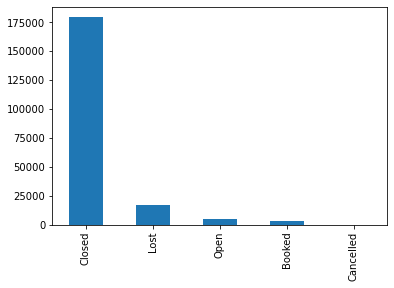

In [83]:
p1 = enquiry_df[enquiry_df['FollowUp']=='1st Follow up']['LeadStatus'].value_counts()
p1.plot.bar()

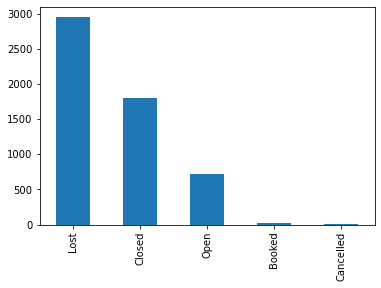

In [84]:
p2 = enquiry_df[enquiry_df['FollowUp']=='2nd Follow up']['LeadStatus'].value_counts()
p2.plot.bar()

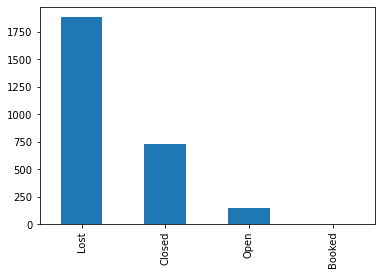

In [85]:
p3 = enquiry_df[enquiry_df['FollowUp']=='3rd Follow up']['LeadStatus'].value_counts()
p3.plot.bar()

### Data Cleaning  = FollowUpDone

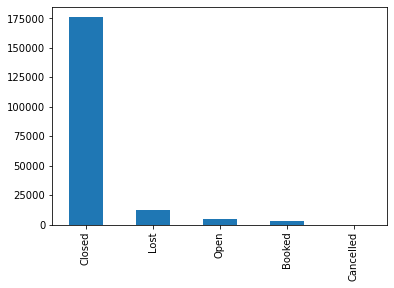

In [86]:
t1 = enquiry_df[enquiry_df['FollowUpDone']=='No']['LeadStatus'].value_counts()
t1.plot.bar()

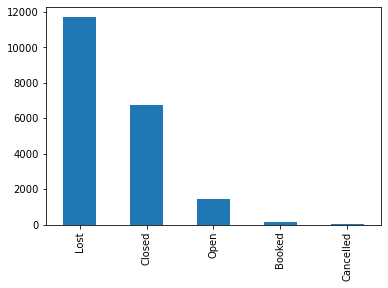

In [87]:
t2 = enquiry_df[enquiry_df['FollowUpDone']=='Yes']['LeadStatus'].value_counts()
t2.plot.bar()

### Data Cleaning = SourceOfEnquiry

In [88]:
enquiry_df['SourceOfEnquiry'].value_counts()

General Enquiry             57414
Referral                     4822
Advertisement                4317
Activity                     4184
Web Site                     1804
Publicity/Bike Review         947
Existing Customer             852
Facebook                      352
SMS                           310
Digital                       138
TAB                            47
Google_Brand_Broad             13
Google_Generic_Broad            8
Google_Competition_Exact        6
Google_GDN_Generic              4
Google_Brand_Exact              2
Google_Competition_Broad        2
GDN_LLA                         1
Google_Generic_Exact            1
GDN_banners                     1
Orange Camp                     1
Service WorkShop                1
Name: SourceOfEnquiry, dtype: int64

In [89]:
enquiry_df.loc[enquiry_df['SourceOfEnquiry'].isna(),'SourceOfEnquiry'] = "Source Not Available"

In [90]:
enquiry_df.isna().sum()

Enquiry                 0
DealerCity              0
DealerState             0
BranchType              0
LeadType                0
PaymentMode             0
State                   0
City                    0
Pin                     0
ModelFamily             0
ModelCode               0
TotalAmount             0
TestRideOffered         0
Occupation         215123
DOB                192471
LeadStatus              0
LeadLostReason          0
FollowUp                0
CustomerAge        185644
SourceOfEnquiry         0
FollowUpDone            0
dtype: int64

In [91]:
enquiry_df.shape

(215868, 21)

In [92]:
enquiry_df.to_csv('Cleaned Data/enquiry_df_cleaned.csv',index=False)

### Tried and failed methods